(ws11)=
# Worksheet 11 

## To accompany Unit 5.4: Models of Discrete-Time Systems

## Colophon

This worksheet can be downloaded as a [PDF file](https://cpjobling.github.io/eg-247-textbook/worksheets/worksheet17.pdf). We will step through this worksheet in class. 

An annotatable copy of the notes for this presentation will be distributed before the second class meeting as **Worksheet 17** in the **Week 9: Classroom Activities** section of the Canvas site. I will also distribute a copy to your personal **Worksheets** section of the **OneNote Class Notebook** so that you can add your own notes using OneNote. 

You are expected to have at least watched the video presentation of [Models of Discrete-Time Systems](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/dt_models) of the [notes](https://cpjobling.github.io/eg-247-textbook) before coming to class. If you haven't watch it afterwards!

After class, the lecture recording and the annotated version of the worksheets will be made available through Canvas.

## Agenda

* Discrete Time Systems ([Notes](dt_models.html#dts))

* Transfer Functions in the Z-Domain ([Notes](dt_models.html#tf))

* [Modelling digital systems in MATLAB/Simulink](simulink)

* [Converting Continuous Time Systems to Discrete Time Systems](cse)

* [Example: Digital Butterworth Filter](demo)

## Discrete Time Systems

In the lecture that introduced the z-transform we talked about the representation of a discrete-time (DT) system by the model shown below:

![Model of a DT system](./pictures/ct-to-dt.png)

In this session, we want to explore the contents of the central block.

### Example 5

Karris Example 9.10:

The difference equation describing the input-output relationship of a DT system with zero initial conditions, is:

$$y[n] - 0.5 y[n-1] + 0.125 y[n-2] = x[n] + x[n -1]$$

Compute:

1. The transfer function $H(z)$
2. The DT impulse response $h[n]$
3. The response $y[n]$ when the input $x[n]$ is the DT unit step $u_0[n]$

#### 5.1. The transfer function

$$H(z) = \frac{Y(z)}{U(z)} = ...?$$

<pre style="border: 2px solid blue">



















</pre>

Solution [example5.1.pdf](https://cpjobling.github.io/eg-247-textbook/dt_systems/solutions/example5.1.pdf)

#### 5.2. The DT impulse response

Start with:

$$\frac{H(z)}{z} = \frac{z + 1}{z^2 - 0.5 z + 0.125}$$

<pre style="border: 2px solid blue">



















</pre>

Solution [example5.2.pdf](https://cpjobling.github.io/eg-247-textbook/dt_systems/solutions/example5.2.pdf)

##### MATLAB Solution

In [1]:
clear all
cd matlab
pwd
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dt_systems/4/matlab'



See [dtm_ex1_2.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_2.mlx). (Also available as [dtm_ex1_2.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_2.m).)

The difference equation describing the input-output relationship of the DT system with zero initial conditions, is:

$$y[n] - 0.5 y[n-1] + 0.125 y[n-2] = x[n] + x[n -1]$$

###### Transfer function

Numerator $z^2 + z$

In [ ]:
Nz = [1 1 0];

Denominator $z^2 - 0.5 z + 0.125$

In [ ]:
Dz = [1 -0.5 0.125];

###### Poles and residues

In [ ]:
[r,p,k] = residue(Nz,Dz)

###### Impulse Response

In [ ]:
Hz = tf(Nz,Dz,-1)
hn = impulse(Hz, 15);

###### Plot the response

In [ ]:
stem([0:15], hn)
grid
title('Example 5 - Part 2')
xlabel('n')
ylabel('Impulse response h[n]')

###### Response as stepwise continuous y(t)

In [ ]:
impulse(Hz,15)
grid
title('Example 5 - Part 2 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Impulse response h(t)')

#### 5.3. The DT step response

$$Y(z) = H(z)X(z)$$

$$u_0[n] \Leftrightarrow \frac{z}{z - 1}$$

$$\begin{array}{lcl}
Y(z) = H(z){U_0}(z) &=& \frac{z^2 + z}{z^2 + 0.5z + 0.125}.\frac{z}{z - 1}\\
 & = & \frac{z(z^2 + z)}{(z^2 + 0.5z + 0.125)(z - 1)}
\end{array}$$

$$\frac{Y(z)}{z} = \frac{z^2 + z}{(z^2 + 0.5 z + 0.125)(z - 1)}$$

Solved by inverse Z-transform.

<pre style="border: 2px solid blue">



















</pre>

Solution [example5.3.pdf](https://cpjobling.github.io/eg-247-textbook/dt_systems/solutions/example5.3.pdf)

#### MATLAB Solution

See [dtm_ex1_3.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_3.mlx). (Also available as [dtm_ex1_3.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_3.m).)

In [2]:
open dtm_ex1_3

##### Results

![Results](./pictures/dtm_ex1_3_1.png)

## Modelling DT systems in MATLAB and Simulink

We will consider some examples in class

### MATLAB

Code extracted from [dtm_ex1_3.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_3.m):

In [ ]:
Ts = 1;
z = tf('z', Ts);

In [ ]:
Hz = (z^2 + z)/(z^2 - 0.5 * z + 0.125)

In [ ]:
step(Hz)
grid
title('Example 1 - Part 3 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Step response y(t)')
axis([0,15,0,3.5])

### Simulink Model

See [dtm.slx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm.slx):

![Simulink model](./pictures/simulink_model.png)

In [3]:
dtm

#### Results

![Simulink results](./pictures/scope.png)

## Converting Continuous Time Systems to Discrete Time Systems

### Continuous System Equivalents

* There is no digital system that uniquely represents a continuous system
* This is because as we are sampling, we only have knowledge of signals being processed at the sampling instants, and need to *reconstruct* the inter-sample behaviour.
* In practice, only a small number of transformations are used.
* The derivation of these is beyond the scope of this module, but here we'll demonstrate the ones that MATLAB provides in a function called `c2d`

### MATLAB c2d function

Let's see what the help function says:

In [ ]:
help c2d

## Example: Digital Butterworth Filter

* Design a 2nd-order butterworth low-pass anti-aliasing filter with transfer function $H(s)$ for use in sampling music. 
* The cut-off frequency $\omega_c = 20$&nbsp;kHz and the filter should have an attenuation of at least $-80$&nbsp;dB in the stop band. 
* Choose a suitable sampling frequency for the audio signal and give the transfer function $H(z)$ and an algorithm to implement $h[n]$

### Solution

See [digi_butter.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/digi_butter.mlx).

First determine the cut-off frequency $\omega_c$

$$\omega_c = 2\pi f_c = 2\times \pi \times 20\times 10^3\;\mathrm{rad/s}$$

In [4]:
wc = 2*pi*20e3

wc =
   1.2566e+05


$$\omega_c = 125.66\times 10^3\;\mathrm{rad/s}$$

From the lecture on filters, we know the 2nd-order butterworth filter has transfer function:

$$H(s) = \frac{Y(s)}{U(s)} = \frac{\omega _c^2}{s^2 + \omega _c\sqrt 2 \,s + \omega _c^2}$$

Substituting for $\omega_c = 125.6637\times 10^3 $ this is ...?

In [5]:
Hs = tf(wc^2,[1 wc*sqrt(2), wc^2])


Hs =
 
           1.579e10
  ---------------------------
  s^2 + 1.777e05 s + 1.579e10
 
Continuous-time transfer function.


$$H(s) = \frac{15.79 \times 10^9}{s^2 + 177.7 \times 10^3 s + 15.79 \times 10^9}$$

#### Bode plot

MATLAB:

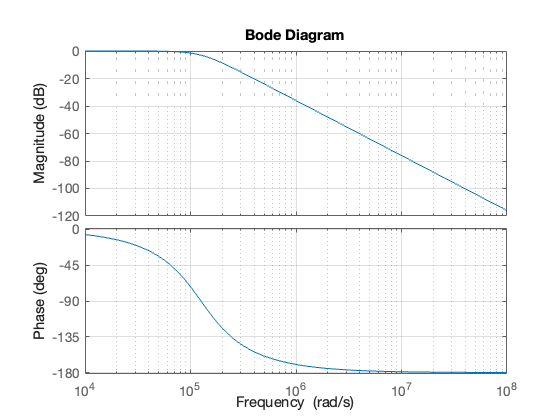

In [6]:
bode(Hs,{1e4,1e8})
grid

#### Sampling Frequency

From the bode diagram, the frequency roll-off is -40 dB/decade for frequencies $\omega \gg \omega_c$. So, $|H(j\omega)| = -80$&nbsp;dB  is approximately 2 decades above $\omega_c$.

In [7]:
w_stop = 100*wc

w_stop =
   1.2566e+07


To avoid aliasing, we should choose a sampling frequency twice this = ?

$\omega_s = 2\times 12.6\times 10^6$&nbsp;rad/s.

In [8]:
ws = 2 * w_stop

ws =
   2.5133e+07


So

$\omega_s = 25.133\times 10^6$&nbsp;rad/s.

Sampling frequency ($f_s$) in Hz  = ?

$$f_s = \omega_s/(2\pi)\;\mathrm{Hz}$$

In [9]:
fs = ws/(2*pi)

fs =
     4000000


Sampling time $T_s = ?$

$T_s = 1/fs\;\mathrm{s}$

In [10]:
Ts = 1/fs

Ts =
   2.5000e-07


#### Digital Butterworth

zero-order-hold equivalent

In [11]:
Hz = c2d(Hs, Ts)


Hz =
 
  0.0004862 z + 0.0004791
  -----------------------
  z^2 - 1.956 z + 0.9565
 
Sample time: 2.5e-07 seconds
Discrete-time transfer function.


#### Step response

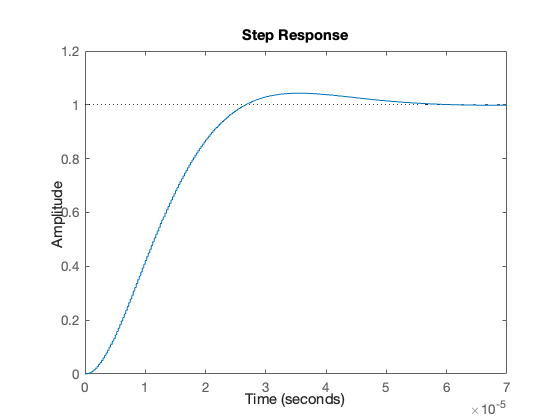

In [12]:
step(Hz)

#### Algorithm

From final result:

$$H(z) = \frac{Y(z)}{U(z)} = \frac{486.2\times 10^{-6}z +  479.1\times 10^{-6}}{z^2 - 1.956z + 0.9665}$$

Dividing top and bottom by $z^2$ ...

$$H(z) = \frac{Y(z)}{U(z)} = \frac{486.2\times 10^{-6}z^{-1} +  479.1\times 10^{-6}z^{-2}}{1 - 1.956z^{-1} + 0.9665z^{-2}}$$

expanding out ...

$$\begin{array}{l}
Y(z) - 1.956{z^{ - 1}}Y(z) + 0.9665{z^{ - 2}}Y(z) = \\
\quad 486.2 \times {10^{ - 6}}{z^{ - 1}}U(z) + 479.1 \times {10^{ - 6}}{z^{ - 2}}U(z)
\end{array}$$

Inverse z-transform gives ...

$$\begin{array}{l}
y[n] - 1.956y[n - 1] + 0.9665y[n - 2] = \\
\quad 486.2 \times {10^{ - 6}}u[n - 1] + 479.1 \times {10^{ - 6}}u[n - 2]
\end{array}$$

in algorithmic form (compute $y[n]$ from past values of $u$ and $y$) ...

$$\begin{array}{l}
y[n] = 1.956y[n - 1] - 0.9665y[n - 2] + 486.2 \times {10^{ - 6}}u[n - 1] + ...\\
\quad 479.1 \times {10^{ - 6}}u[n - 2]
\end{array}$$

#### Block Diagram of the digital BW filter

![digital filter](pictures/digifilter-bd.png)

#### As Simulink Model

[digifilter.slx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/digifilter.slx)

In [13]:
open digifilter

#### Convert to code

To implement:

$$y[n] = 1.956 y[n-1] - 0.9665 y[n - 2] + 486.2\times 10^{-6} u[n-1] + 479.1\times 10^{-6} u[n-2]$$

    /* Initialize */
    Ts = 0.25e-06; /* more probably some fraction of clock speed */
    ynm1 = 0; ynm2 = 0; unm1 = 0; unm2 = 0;
    while (true) {
        un = read_adc;
        yn = 1.956*ynm1 - 0.9665*ynm2 + 479.1e-6*unm1 + 476.5e-6*unm2;
        write_dac(yn);
        /* store past values */
        ynm2 = ynm1; ynm1 = yn;
        unm2 = unm1; unm1 = un;
        wait(Ts);
    }